# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [37]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [38]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [39]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

# e is the error term

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [40]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

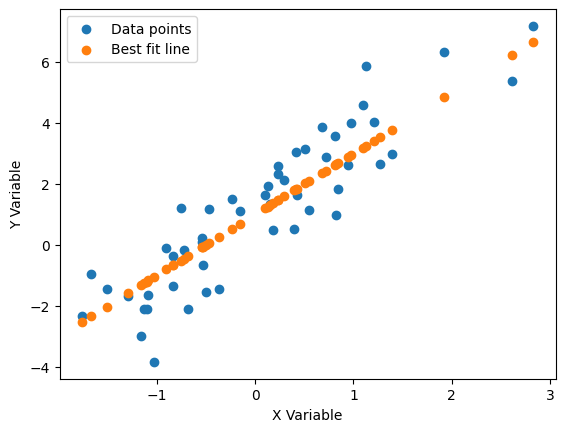

In [41]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [42]:
# Write your own code here
subset_above2 = dataset.query("y >= 2")
original = len(dataset)
new = len(subset_above2)
print(original)
print(new)
print("Proportion: " + str(new/original))




50
18
Proportion: 0.36


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [43]:
# Note: abs(...) is the absolute value function
# Write your own code 

ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()
print(ybar)
print(stdv_sample)

observations = dataset.query("abs(y-@ybar) <= @stdv_sample")
print(observations)




1.1852508030626572
2.533594678464502
           x         e         y         p
0  -0.237364  0.975997  1.501270  0.525273
1  -0.153620  0.419094  1.111854  0.692760
4  -0.539399  0.320043  0.241246 -0.078797
5  -0.726252  0.293931 -0.158574 -0.452505
6   0.127197  0.666659  1.921052  1.254393
7  -1.672350  1.394344 -0.950356 -2.344700
10  0.099632  0.450249  1.649512  1.199263
11  0.423953 -0.209492  1.638415  1.847906
13 -0.471727  1.132913  1.189460  0.056547
15  0.716207  0.443292  2.875707  2.432415
16 -0.539232  0.188270  0.109805 -0.078465
19  0.839478 -0.854341  1.824615  2.678956
20  0.148040  0.043432  1.339511  1.296079
23 -0.758538  1.738774  1.221699 -0.517075
25  1.391419 -0.789621  2.993216  3.782837
26  0.813432  0.962034  3.588898  2.626864
29  0.419148  1.222153  3.060449  1.838296
30  0.949550 -0.284054  2.615047  2.899100
32  0.237013  0.863758  2.337784  1.474026
34  0.186998 -0.874230  0.499765  1.373995
35  0.511931  1.130571  3.154433  2.023862
36  0.236773  1.1

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [44]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [45]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.050108
x            2.190830
dtype: float64


<font size = "5">

Plot the best fit line

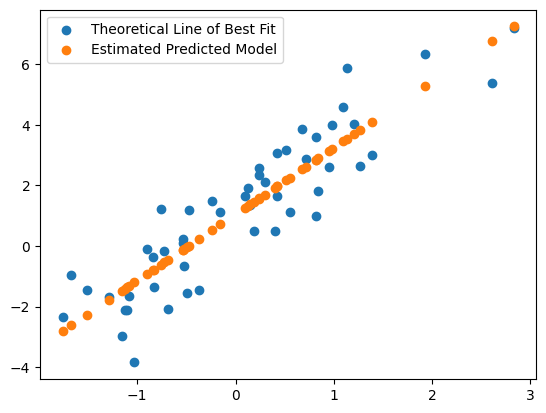

In [48]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data Values","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

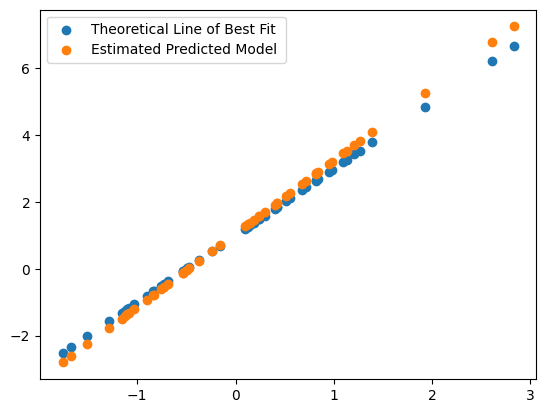

In [49]:
# Write your own code
plt.scatter(x = dataset["x"], y = dataset["p"])
plt.scatter(x = dataset["x"], y = dataset["p_estimated"])

plt.legend(labels = ["Theoretical Line of Best Fit ","Estimated Predicted Model"])
plt.show()




<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [55]:
# Write your own code

dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]

fn_pos_error= lambda error: error >= 0 

dataset["pos_error"] = list(map(fn_pos_error, dataset["sample_error"]))
dataset["positive_error"] = dataset["sample_error"].apply(fn_pos_error)
display(dataset)




,x,e,y,p,p_estimated,sample_error,pos_error,error_sqr,positive_error
0,-0.237364,0.975997,1.501270,0.525273,0.530085,0.971185,True,0.943201,True
1,-0.153620,0.419094,1.111854,0.692760,0.713552,0.398301,True,0.158644,True
2,1.097432,1.380250,4.575113,3.194863,3.454394,1.120719,True,1.256012,True
3,-1.084448,-0.487503,-1.656398,-1.168896,-1.325733,-0.330665,False,0.109339,False
4,-0.539399,0.320043,0.241246,-0.078797,-0.131623,0.372868,True,0.139031,True
5,-0.726252,0.293931,-0.158574,-0.452505,-0.540988,0.382414,True,0.146241,True
6,0.127197,0.666659,1.921052,1.254393,1.328774,0.592278,True,0.350794,True
7,-1.672350,1.394344,-0.950356,-2.344700,-2.613727,1.663370,True,2.766801,True
8,-0.833284,-0.687251,-1.353820,-0.666568,-0.775476,-0.578343,False,0.334481,False
9,-0.495825,-1.566377,-1.558026,0.008351,-0.036160,-1.521866,False,2.316077,False


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [53]:
# Write your own code



dataset["error_sqr"] = dataset["sample_error"] ** 2

mean_error_sqr = dataset["error_sqr"].mean()
print(mean_error_sqr)





1.1765051705508325
